In [1]:
#          #####################################################################################
#          #                                    IN THE NAME OF ALLAH                           #
#          #                      FREE VIBRATION ANALYSIS WITH SEISMIC LOADING                 #
#          #          INTIAL VELOCITY AND TWO SEISMIC ACCELERATION IN X AND Y DIRECTION        #
#          #                 AND SOIL-STRUCTURE INTERACTION AND TWO MASSES AND CONTACT         #
#          #-----------------------------------------------------------------------------------#
#          #              THIS PROGRAM WRITTEN BY SALAR DELAVAR GHASHGHAEI (QASHQAI)           #
#          #                       EMAIL: salar.d.ghashghaei@gmail.com                         #
#          #####################################################################################

Modeling soil-structure interaction (SSI) with lateral and rotational springs in OpenSees involves defining the properties
and behavior of the springs to simulate the interaction between the soil and structure. Considering the large variation of stiffness
across various deposits or within the same soil, its required to conduct site or lab-tests to estimate a reliable value of stiffness
(direct or coupled stiffness) under proper drainage condition.
An SSI study with an incorrect stiffness would spoil the purpose of the study. Further, the designer need to have a good estimate of strain 
levels to assume a suitable value of damping.
For soils exhibiting elastic or elastoplastic behavior, the stiffness and damping ratio can vary significantly.
Here are some general estimates:
### Stiffness (k in N/m)
- Clay soils: Stiffness can range from 5 MPa to 20 MPa (MegaPascals, equivalent to N/m²).
- Sandy soils: Stiffness can range from 10 MPa to 50 MPa.
- Gravelly soils: Stiffness can range from 20 MPa to 100 MPa.
- Stony soils: Stiffness can range from 200 MPa to 1500 MPa.

### Damping Ratio (ζ)
- Clay soils: Damping ratio typically ranges from 5% to 15%.
- Sandy soils: Damping ratio typically ranges from 2% to 10%.
- Gravelly soils: Damping ratio typically ranges from 1% to 5%.
- Stony soils: Damping ratio typically ranges from 0.5% to 3%.

These values are approximate and can vary based on factors such as moisture content, compaction,
and the presence of organic material.
For accurate assessments, it's best to conduct site-specific geotechnical investigations.

-------------------------------------------------------------------

Contact problems in finite element analysis (FEA) are quite fascinating and complex!
They involve the interaction between two or more bodies that come into contact with each other.
Here's a brief overview:

### What are Contact Problems?
Contact problems occur when two or more bodies come into contact and interact with each other.
 This interaction can involve forces, displacements, and stresses at the contact interface.
 Examples include metal forming, vehicle crashes, and gear systems.

### Lateral Springs in Contact Problems
Lateral springs are used in FEA to model the contact behavior between bodies.
 They provide a way to simulate the stiffness and damping properties of the contact interface. Here's how they work:

1. Representation: Lateral springs are represented as elements that connect the nodes of the contacting bodies.
2. Stiffness: The stiffness of the lateral springs determines how much resistance they provide against lateral movements.
3. Damping: Damping properties help in absorbing energy and reducing oscillations at the contact interface.

### Challenges in Modeling Contact Problems
Contact problems are inherently nonlinear and can be challenging to solve. Some of the key challenges include:
- Nonlinearity: The contact force-displacement relationship is highly nonlinear.
- Convergence: Ensuring the numerical model converges can be difficult due to the complex nature of contact interactions.
- Computational Cost: Tracking contact and separation can be computationally expensive.

### Applications
Contact problems are crucial in various engineering fields, such as:
- Automotive Engineering: For crash simulations and component interactions.
- Mechanical Engineering: For gear and bearing analysis.
- Manufacturing: For metal forming and stamping processes.

In [2]:
# BOOK: Design of Water Retaining Structures
'http://ndl.ethernet.edu.et/bitstream/123456789/48973/1/Forth%2C%20J.%20P._%20Martin%2C%20A.%20J-Design%20of%20liquid%20retaining%20concrete%20structures-Whittles%20Publishing%20%282014%29.pdf'
# REPORT: Soil-Structure Interaction for Building Structures 
'https://www.nehrp.gov/pdf/nistgcr12-917-21.pdf'
# PAPER: Numerical models in geotechnics including soil-structure interaction
'https://www.sciencedirect.com/science/article/abs/pii/B9780128212059000198'

'https://www.sciencedirect.com/science/article/abs/pii/B9780128212059000198'

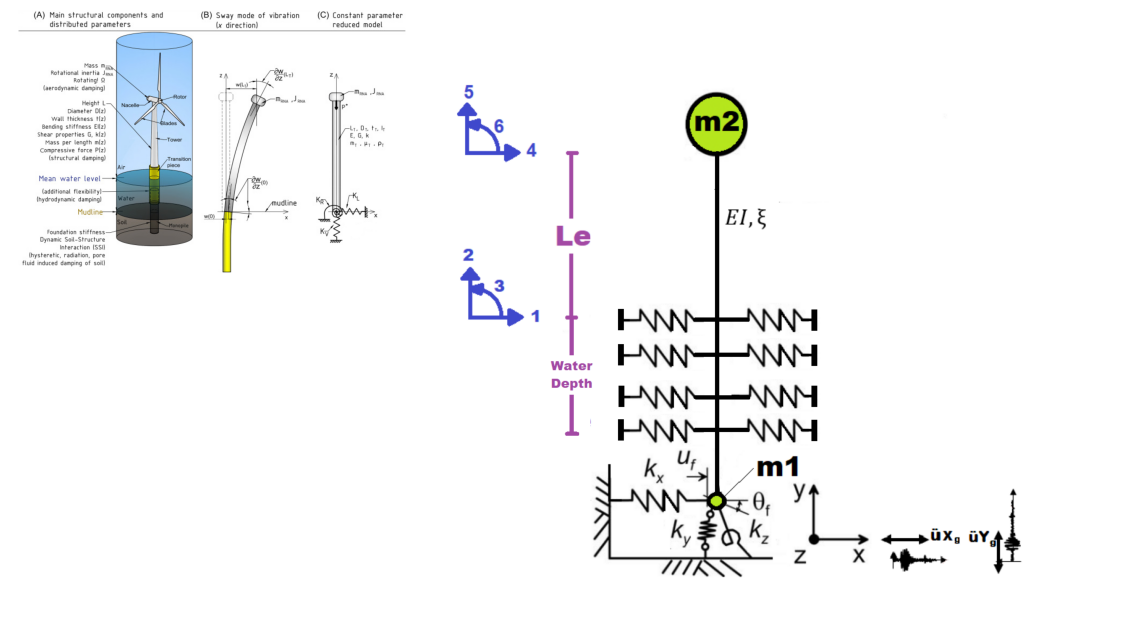

In [5]:
# Load the image
def PLOT_IMAGE(image):
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    image = mpimg.imread(image_path)

    # Display the image
    plt.figure(figsize=(15, 8))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
    
image_path = 'OPENSEES_SOIL_STRUCTURE_WATER_INTERACTION_COLUMN_SEISMIC.png'    
PLOT_IMAGE(image_path)

In [13]:
#import the os module
import os
import time
import numpy as np
import openseespy.opensees as op
import opsvis as opsv
import matplotlib.pyplot as plt

In [14]:
#to create a directory at specified path with name "Data"
os.mkdir('C:\\OPENSEESPY_SALAR')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\OPENSEESPY_SALAR'

In [15]:
FOLDER_NAME = 'OPENSEES_SOIL_STRUCTURE_WATER_INTERACTION_COLUMN_SEISMIC'
dir = f"C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\"
if not os.path.exists(dir):
    os.makedirs(dir)

In [16]:
# OUTPUT DATA ADDRESS:
SALAR_DIR = f'C://OPENSEESPY_SALAR//{FOLDER_NAME}//';

In [17]:
## DELETE ALL FILES IN DIRECTORY 
def DELETE_FOLDER_CONTANTS(folder_path):
    import os
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(f"Failed to delete {file_path}. Reason: {e}")
    print("Deletion done")
   
FOLDER_PATH = f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}'  # Specify the folder path
#DELETE_FOLDER_CONTANTS(FOLDER_PATH)   

In [18]:
def PLOT_2D(X1, Y1, X2, Y2, XLABEL, YLABEL, TITLE):
    plt.figure(figsize=(10, 6))
    plt.plot(X1, Y1, label='Undamped', color='black')
    plt.plot(X2, Y2, label='Damped', color='red')
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    plt.title(TITLE)
    plt.grid(True)
    #plt.semilogy()
    plt.legend()
    plt.show()

# ---------------------------------

def PLOT_SPRING():
    import matplotlib.pyplot as plt
    # Extract displacements and forces
    displacement_kh, force_kh = zip(*kh)
    displacement_kv, force_kv = zip(*kv)
    displacement_kr, force_kr = zip(*kr)
    
    # Plotting the force-displacement relation
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(displacement_kh, force_kh, label='Horizontal Spring', color='blue')
    plt.xlabel('Displacement (m)')
    plt.ylabel('Force (N)')
    plt.title('Horizontal Spring Force-Displacement Relation')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot(displacement_kv, force_kv, label='Vertical Spring', color='green')
    plt.xlabel('Displacement (m)')
    plt.ylabel('Force (N)')
    plt.title('Vertical Spring Force-Displacement Relation')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    plt.plot(displacement_kr, force_kr, label='Rotational Spring', color='red')
    plt.xlabel('Rotation (rad)')
    plt.ylabel('Moment (N.mm)')
    plt.title('Rotational Spring Moment-Rotation Relation')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
# ---------------------------------   
    
def PLOT_4_CHART(time_undamped, time_damped, displacement_n1x_undamped, displacement_n1x_damped, 
                 displacement_n2x_undamped, displacement_n2x_damped, velocity_n1_undamped, 
                 velocity_n1_damped, velocity_n2_undamped, velocity_n2_damped, acceleration_n1_undamped, 
                 acceleration_n1_damped, acceleration_n2_undamped, acceleration_n2_damped, 
                 spring_force_H_undamped, spring_force_H_damped, spring_force_V_undamped, 
                 spring_force_V_damped, spring_force_M_undamped, spring_force_M_damped, 
                 ele_force_undamped, ele_force_damped):
    import matplotlib.pyplot as plt
    import numpy as np
    # Plot the results
    plt.figure(figsize=(18, 28))
    
    # Displacement - NODE 01
    plt.subplot(8, 1, 1) 
    P1 = displacement_n1x_undamped
    P2 = displacement_n1x_damped
    plt.plot(time_undamped, P1, label=f'Undamped: {np.max(np.abs(P1)):.5e}', color='black') 
    plt.plot(time_damped, P2, label=f'Damped: {np.max(np.abs(P2)):.5e}', color='red')
    plt.xlabel('Time [s]') 
    plt.ylabel('Displacement X') 
    plt.title('Displacement Time History - NODE 01') 
    plt.legend()

    plt.subplot(8, 1, 2) 
    P1 = displacement_n1y_undamped
    P2 = displacement_n1y_damped
    plt.plot(time_undamped, P1, label=f'Undamped: {np.max(np.abs(P1)):.5e}', color='black') 
    plt.plot(time_damped, P2, label=f'Damped: {np.max(np.abs(P2)):.5e}', color='red')
    plt.xlabel('Time [s]') 
    plt.ylabel('Displacement Y') 
    plt.title('Displacement Time History - NODE 01') 
    plt.legend()
    
    # Displacement - NODE 02
    plt.subplot(8, 1, 3)
    P1 = displacement_n2x_undamped
    P2 = displacement_n2x_damped
    plt.plot(time_undamped, P1, label=f'Undamped: {np.max(np.abs(P1)):.5e}', color='black') 
    plt.plot(time_damped, P2, label=f'Damped: {np.max(np.abs(P2)):.5e}', color='red')
    plt.xlabel('Time [s]') 
    plt.ylabel('Displacement X') 
    plt.title('Displacement Time History - NODE 02') 
    plt.legend()

    plt.subplot(8, 1, 4)
    P1 = displacement_n2y_undamped
    P2 = displacement_n2y_damped
    plt.plot(time_undamped, P1, label=f'Undamped: {np.max(np.abs(P1)):.5e}', color='black') 
    plt.plot(time_damped, P2, label=f'Damped: {np.max(np.abs(P2)):.5e}', color='red')
    plt.xlabel('Time [s]') 
    plt.ylabel('Displacement Y') 
    plt.title('Displacement Time History - NODE 02') 
    plt.legend()
    
    # Velocity - NODE 01
    P1 = velocity_n1_undamped
    P2 = velocity_n1_damped
    plt.subplot(8, 1, 5) 
    plt.plot(time_undamped, P1, label=f'Undamped: {np.max(np.abs(P1)):.5e}', color='black') 
    plt.plot(time_damped, P2, label=f'Damped: {np.max(np.abs(P2)):.5e}', color='red')
    plt.xlabel('Time [s]') 
    plt.ylabel('Velocity') 
    plt.title('Velocity Time History - NODE 01') 
    plt.legend()

    # Velocity - NODE 02
    P1 = velocity_n2_undamped
    P2 = velocity_n2_damped
    plt.subplot(8, 1, 6) 
    plt.plot(time_undamped, P1, label=f'Undamped: {np.max(np.abs(P1)):.5e}', color='black') 
    plt.plot(time_damped, P2, label=f'Damped: {np.max(np.abs(P2)):.5e}', color='red')
    plt.xlabel('Time [s]') 
    plt.ylabel('Velocity') 
    plt.title('Velocity Time History - NODE 02') 
    plt.legend()

    
    # Acceleration - NODE 01
    P1 = acceleration_n1_undamped
    P2 = acceleration_n1_damped
    plt.subplot(8, 1, 7) 
    plt.plot(time_undamped, P1, label=f'Undamped: {np.max(np.abs(P1)):.5e}', color='black') 
    plt.plot(time_damped, P2, label=f'Damped: {np.max(np.abs(P2)):.5e}', color='red')
    plt.xlabel('Time [s]') 
    plt.ylabel('Acceleration') 
    plt.title('Acceleration Time History - NODE 01') 
    plt.legend()
    
    # Acceleration - NODE 02
    P1 = acceleration_n2_undamped
    P2 = acceleration_n2_damped
    plt.subplot(8, 1, 8)
    plt.plot(time_undamped, P1, label=f'Undamped: {np.max(np.abs(P1)):.5e}', color='black') 
    plt.plot(time_damped, P2, label=f'Damped: {np.max(np.abs(P2)):.5e}', color='red') 
    plt.xlabel('Time [s]') 
    plt.ylabel('Acceleration') 
    plt.title('Acceleration Time History - NODE 02') 
    plt.legend()

    # Display the plot
    plt.show()
    
    plt.figure(figsize=(18, 20))
    # Spring Force - SHEAR
    P1 = spring_force_H_undamped
    P2 = spring_force_H_damped
    plt.subplot(4, 1, 1) 
    plt.plot(time_undamped, P1, label=f'Undamped: {np.max(np.abs(P1)):.5e}', color='black') 
    plt.plot(time_damped, P2, label=f'Damped: {np.max(np.abs(P2)):.5e}', color='red') 
    plt.xlabel('Time [s]') 
    plt.ylabel('Horizontal Axial Spring Force') 
    plt.title('Spring Force Time History - SHEAR') 
    plt.legend()

    # Spring Force - AXIAL
    P1 = spring_force_V_undamped
    P2 = spring_force_V_damped
    plt.subplot(4, 1, 2) 
    plt.plot(time_undamped, P1, label=f'Undamped: {np.max(np.abs(P1)):.5e}', color='black') 
    plt.plot(time_damped, P2, label=f'Damped: {np.max(np.abs(P2)):.5e}', color='red')  
    plt.xlabel('Time [s]') 
    plt.ylabel('Vertical Axial Spring Force') 
    plt.title('Spring Force Time History - AXIAL') 
    plt.legend()

    # Spring Force - MOMENT
    P1 = spring_force_M_undamped
    P2 = spring_force_M_damped
    plt.subplot(4, 1, 3) 
    plt.plot(time_undamped, P1, label=f'Undamped: {np.max(np.abs(P1)):.5e}', color='black') 
    plt.plot(time_damped, P2, label=f'Damped: {np.max(np.abs(P2)):.5e}', color='red') 
    plt.xlabel('Time [s]') 
    plt.ylabel('Moment Spring Force') 
    plt.title('Spring Force Time History - MOMENT') 
    plt.legend()
    
    # Element Force
    P1 = ele_force_undamped
    P2 = ele_force_damped
    plt.subplot(4, 1, 4) 
    plt.plot(time_undamped, P1, label=f'Undamped: {np.max(np.abs(P1)):.5e}', color='black') 
    plt.plot(time_damped, P2, label=f'Damped: {np.max(np.abs(P2)):.5e}', color='red') 
    plt.xlabel('Time [s]') 
    plt.ylabel('Element Force') 
    plt.title('Element Force Time History') 
    plt.legend()
    
    # Display the plot
    plt.show()


# --------------------------------- 

def SECTION_REC(sectionID, matID, B, H, numY, numZ):
    # numY , numZ = 1000, 1
    # Define fiber rectangular section
    op.section('Fiber', sectionID)
    #patch rect $matTag $numSubdivY $numSubdivZ $yI $zI $yJ $zJ
    op.patch('rect', matID, numY, numY, -0.5*H, -B, 0.5*H, B)  # Core

# ---------------------

"""
When OK equals -1, it generally indicates that the command or operation was not executed
because it was already in progress or had already been completed. This can happen if you
try to run a command that is already running or has been completed in a previous step.

When OK equals -2, it typically indicates that the command or operation was not executed
because it was not recognized or not implemented. This could mean that the command
is either misspelled, not available in the current version of OpenSees, or not applicable to the current context.

When OK equals -3, it typically means that the command or operation failed.
This could be due to various reasons, such as incorrect input parameters,
syntax errors, or issues with the model setup.
"""
def ANALYSIS(OK, INCREMENT, TOLERANCE, MAX_ITERAIONS):
    import openseespy.opensees as op
    test = {1:'NormDispIncr', 2: 'RelativeEnergyIncr', 4: 'RelativeNormUnbalance',5: 'RelativeNormDispIncr', 6: 'NormUnbalance'}
    algorithm = {1:'KrylovNewton', 2: 'SecantNewton' , 4: 'RaphsonNewton',5: 'PeriodicNewton', 6: 'BFGS', 7: 'Broyden', 8: 'NewtonLineSearch'}

    for i in test:
        for j in algorithm:
            if OK != 0:
                if j < 4:
                    op.algorithm(algorithm[j], '-initial')

                else:
                    op.algorithm(algorithm[j])

                op.test(test[i], TOLERANCE, MAX_ITERAIONS) 
                OK = op.analyze(INCREMENT)                            
                print(test[i], algorithm[j], OK)             
                if OK == 0:
                    break
            else:
                continue
				
# ---------------------

Lateral column Stiffness: 1555.556 (N/mm)


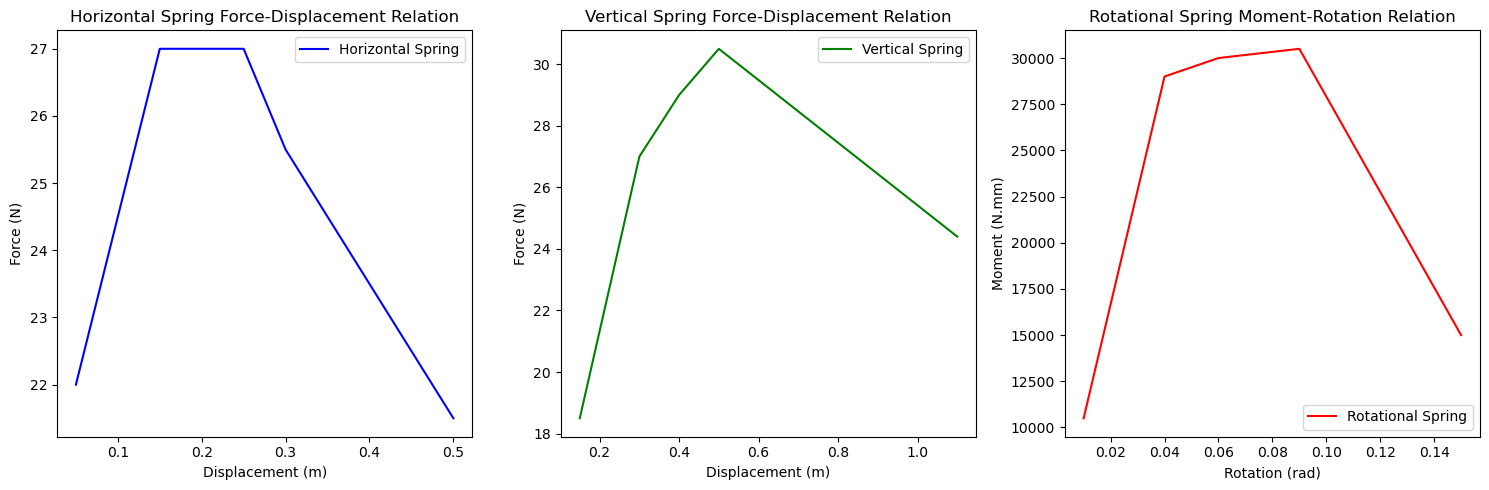

In [21]:
import openseespy.opensees as ops
import numpy as np
import matplotlib.pyplot as plt

# Set up variables
Ea = 210.0e3  # [N/mm^2] Modulus of elasticity (Young's modulus)
B = 100 # [mm] Section Width
H = 200 # [mm] Section Height
Le = 3000.0  # [mm] Length of the column element
A = B * H # [mm^2] Cross-sectional area of the element
I = (B * H**3) / 12 # [mm^4] 
KE = (3 * Ea * I) / Le**3 # [N/mm] Lateral column Effective Stiffness
print(f'Lateral column Stiffness: {KE:.3f} (N/mm)')
iv0 = 0.005                   # [mm/s] Initial velocity applied to the node
st_iv0 = 0.0                  # [s] Initial velocity applied starting time
damping_ratio = 0.05          # Damping ratio
soil_damping_ratio = 0.015    # Damping ratio for Stony soils
MS = 10000                    # [kg] mass values for node 1

# Define masses for multiple nodes
mass_values = [100.0, 500.0]  # [kg] mass values for node 2

#CONTACT = True
#CONTACT_DISP = 0.2            # [mm] CONTACT DISPLACEMENT

# Set analysis parameters
duration = 50.0 # [s] 50 Seconds
dt = 0.01

# Define ReinforcingSteel material properties
fy_m = 400.0    # [N/mm^2] Yield strength of steel
Es_m = 210.0e3  # [N/mm^2] Modulus of elasticity
fu_m = 600.0    # [N/mm^2] Ultimate strength
Esh_m = 20.0e3  # [N/mm^2] Hardening modulus
esh_m = 0.03    # [mm/mm] Strain at start of hardening
esu_m = 0.1     # [mm/mm] Ultimate strain

# Section Fibers
numY , numZ = 1000, 1

# Trigonometric (Harmonic) loading parameters
START_TIME = 2.0
END_TIME = 12.0
PERIOD = 3.2
LOAD_FACTOR = 15.0 # Amplitude Factor

MAX_ITERATIONS = 5000 # convergence iteration for test
TOLERANCE = 1.0e-10   # convergence tolerance for test

# Define soil-structure interaction springs at base (Node 1)
# [1] ELASTIC SOIL & [2] ELASTIC-NO TENSION SOIL:
# Spring constants for soil-structure interaction
k_horizontal = 210.0e4  # [N/mm] Horizontal spring constant
k_vertical = 150.0e4    # [N/mm] Vertical spring constant
k_rotational = 550.0e4  # [N.mm/Rad] Rotational spring constant

# [3] ELASTO-PLASTIC SOIL:
# Horizontal spring parameters
fy_h = 400.0      # [N] Yield force
Es_h = 21000.0    # [N/mm] Lateral Siffness in Horizental Direction
fu_h = 410.0      # [N] Ultimate force
Esh_h = 200.0     # [N/mm] Hardening modulus
esh_h = 0.4       # [mm] Displacement at start of hardening
esu_h = 1.1       # [mm] Ultimate displacement

# Vertical spring parameters
fy_v = 450.0      # [N] Yield force
Es_v = 20000.0    # [N/mm] Lateral Siffness in Vertical Direction
fu_v = 460.0      # [N] Ultimate force
Esh_v = 180       # [N/mm] Hardening modulus
esh_v = 0.5       # [mm] Displacement at start of hardening
esu_v = 1.8       # [mm] Ultimate displacement

# Rotational spring parameters
fy_r = 50e3       # [N.mm] Yield force
Es_r = 50e5       # [N.mm/Rad] Rotational Siffness in Horizental Direction
fu_r = 70e3       # [N.mm] Ultimate force
Esh_r = 50e4      # [N.mm/Rad] Hardening modulus
esh_r = 0.06      # [Rad] Rotation at start of hardening
esu_r = 0.12      # [Rad] Ultimate rotation

# [4] Define the MultiLinear material properties for springs
kh = np.array([[0.05, 22.0], [0.15, 27.0], [0.25, 27.0], [0.3, 25.5], [0.5, 21.5]])                   # k horizontal
kv = np.array([[0.15, 18.5], [0.3, 27.0], [0.4, 29.0], [0.5, 30.5], [1.1, 24.4]])                     # k vertical
kr = np.array([[0.01, 10500.0], [0.04, 29000.0], [0.06, 30000.0], [0.09, 30500.0], [0.15, 15000.0]])  # k rotational

# Create a DataFrame
import pandas as pd
data = {
    "Displacement_X": kh[:, 0],
    "Force (kh)": kh[:, 1],
    "Displacement_Y": kv[:, 0],
    "Force (kv)": kv[:, 1],
    "Rotation_Z": kr[:, 0],
    "Force (kr)": kr[:, 1]
}

#df = pd.DataFrame(data)
PLOT_SPRING()

def INTERACTION_ANALYSIS(MASS_ONE, DAMPING, SOIL_DAMPING, periodTF, LINEAR, SPRING_KIND, CONTACT, CONTACT_DISP):
    import openseespy.opensees as ops
    import numpy as np
    
    KE = (3 * Ea * I) / Le**3; # [N/mm] Lateral column Effective Stiffness
    GMfact = 9.81 # standard acceleration of gravity or standard acceleration 
    # Set up the model
    ops.wipe()
    ops.model('basic', '-ndm', 2, '-ndf', 3)

    # Define nodes
    ops.node(1, 0.0, 0.0)
    ops.node(2, 0.0, Le)
    ops.node(200, 0.0, 0.0)  # SOIL NODE
    ops.node(400, 0.0, Le)   # CONTACT NODE

    # Define boundary conditions (modified to include springs)
    ops.fix(200, 1, 1, 1)  # Node 200 is Fixed in all directions initially - SOIL
    ops.fix(400, 1, 1, 1)  # Node 400 is Fixed in all directions initially - CONTACT
    
    # Assign masses to nodes
    if MASS_ONE == True: 
        ops.mass(2, mass_values[1], mass_values[1], 0.0)
        print('ONE MASS')
        
    if MASS_ONE == False: 
        ops.mass(1, mass_values[0], mass_values[0], 0.0)
        ops.mass(2, mass_values[1], mass_values[1], 0.0)
        print('TWO MASSES')

    # Define material
    matID = 1
    if LINEAR == True:
        ops.uniaxialMaterial('Elastic', matID, Es_m)  
    if LINEAR == False:
        ops.uniaxialMaterial('ReinforcingSteel', 1, fy_m, Es_m, fu_m, Esh_m, esh_m, esu_m)

    # Define fiber rectangular section
    sectionID = 1
    ops.section('Fiber', sectionID)
    #patch rect $matTag $numSubdivY $numSubdivZ $yI $zI $yJ $zJ
    ops.patch('rect', matID, numY, numZ, -0.5*H, -B, 0.5*H, B)  # Core

    # Define geometric transformation
    ops.geomTransf('Linear', 1)
    
    # Define elements
    # element nonlinearBeamColumn $eleTag $iNode $jNode $numIntgrPts $secTag $transfTag 
    eleID =  1
    ops.element('nonlinearBeamColumn', eleID, 1, 2, 5, sectionID, 1)

    # OUTPUT DATA
    ops.recorder('Node', '-file', f"{SALAR_DIR}DTH_DYN.txt",'-time', '-node', 2, '-dof', 1,2,3, 'disp')# Displacement Time History Node 2
    ops.recorder('Node', '-file', f"{SALAR_DIR}VTH_DYN.txt",'-time', '-node', 2, '-dof', 1,2,3, 'vel')  # Velocity Time History Node 2
    ops.recorder('Node', '-file', f"{SALAR_DIR}ATH_DYN.txt",'-time', '-node', 2, '-dof', 1,2,3, 'accel') # Acceleration Time History Node 2
    ops.recorder('Node', '-file', f"{SALAR_DIR}BTH_DYN.txt",'-time', '-node', 1, '-dof', 1,2,3, 'reaction')# Base Shear Time History Node 1
    ops.recorder('Element', '-file', f"{SALAR_DIR}DEF_DYN.txt",'-time', '-ele', 1, 'section', 1, 'deformations')# Curvature Time History

    # Define soil-structure interaction springs at base (Node 1)
    if SPRING_KIND == 1:
        # Elastic Material:
        # uniaxialMaterial Elastic $matTag $E <$eta> <$Eneg> -> (Eneg:	tangent in compression (optional, default=E))
        ops.uniaxialMaterial('Elastic', 2, 0.3 * k_horizontal, 0, k_horizontal)  # Horizontal spring
        ops.uniaxialMaterial('Elastic', 3, 0.3 * k_vertical, 0, k_vertical)      # Vertical spring
        ops.uniaxialMaterial('Elastic', 4, 0.3 * k_rotational, 0, k_rotational)  # Rotational spring
        KS = k_horizontal # Soil Lateral Stiffness
    if SPRING_KIND == 2: 
        # Define horizontal spring
        ops.uniaxialMaterial('ReinforcingSteel', 2, fy_h, Es_h, fu_h, Esh_h, esh_h, esu_h)
        # Define vertical spring
        ops.uniaxialMaterial('ReinforcingSteel', 3, fy_v, Es_v, fu_v, Esh_v, esh_v, esu_v)
        # Define rotational spring
        ops.uniaxialMaterial('ReinforcingSteel', 4, fy_r, Es_r, fu_r, Esh_r, esh_r, esu_r) 
        KS = Es_h # Soil Lateral Stiffness
    if SPRING_KIND == 3:  
        # Elastic-No Tension Material:
        # uniaxialMaterial ENT $matTag $E
        ops.uniaxialMaterial('ENT', 2, k_horizontal)  # Horizontal spring
        ops.uniaxialMaterial('ENT', 3, k_vertical)    # Vertical spring
        ops.uniaxialMaterial('ENT', 4, k_rotational)  # Rotational spring
        KS = k_horizontal # Soil Lateral Stiffness
    if SPRING_KIND == 4:
        # Define soil-structure interaction springs at base (Node 1)
        #                                      STRAIN    STRESS
        ops.uniaxialMaterial('MultiLinear', 2, *kh.flatten()) # Horizontal spring
        ops.uniaxialMaterial('MultiLinear', 3, *kh.flatten()) # Vertical spring
        ops.uniaxialMaterial('MultiLinear', 4, *kh.flatten()) # Rotational spring 
        KS = kh[0][1] / kh[0][0] # Soil Lateral Stiffness

    
    # Soil Natural frequency (rad/s)
    wns = (KS / MS) ** 0.5
    # Soil Damping coefficient (Ns/m)
    CS = 2 * wns * MS * soil_damping_ratio if SOIL_DAMPING else 0.0
    # Define materials for Soil damper
    ops.uniaxialMaterial('Elastic', 5, 0.0, CS)
    
    if SOIL_DAMPING == False:
        # element zeroLength $eleTag $iNode $jNode -mat $matTag1 $matTag2 ... -dir $dir1 $dir2
        ops.element('zeroLength', 2, 200, 1, '-mat', 2, '-dir', 1) # Horizontal spring for soil stiffness
        ops.element('zeroLength', 3, 200, 1, '-mat', 3, '-dir', 2) # Vertical spring for soil stiffness
        ops.element('zeroLength', 4, 200, 1, '-mat', 4, '-dir', 3) # Rotational spring for soil stiffness
    if SOIL_DAMPING == True:
        ops.element('zeroLength', 2, 200, 1, '-mat', 2, 5, '-dir', 1, 1) # Horizontal spring for soil stiffness and damping
        ops.element('zeroLength', 3, 200, 1, '-mat', 3, 5, '-dir', 2, 2) # Vertical spring for soil stiffness and damping
        ops.element('zeroLength', 4, 200, 1, '-mat', 4, '-dir', 3) # Rotational spring for soil stiffness

    # Dynamic analysis setup
    ops.constraints('Transformation')
    ops.numberer('RCM')
    ops.system('UmfPack')
    ops.test('EnergyIncr', TOLERANCE, MAX_ITERATIONS)
    #ops.integrator('CentralDifference')
    ops.integrator('HHT', 0.9)
    #ops.integrator('Newmark', 0.5, 0.25)
    ops.algorithm('ModifiedNewton')

    # Define analysis type
    ops.analysis('Transient')
    
    # Define time series for input motion (Acceleration time history)
    ops.timeSeries('Path', 1, '-dt', 0.01, '-filePath', 'OPENSEES_SPRING_SEISMIC_01.txt', '-factor', GMfact, '-startTime', st_iv0) # SEISMIC-X
    ops.timeSeries('Path', 2, '-dt', 0.01, '-filePath', 'OPENSEES_SPRING_SEISMIC_02.txt', '-factor', GMfact) # SEISMIC-Y

    # Define load patterns
    # pattern UniformExcitation $patternTag $dof -accel $tsTag <-vel0 $vel0> <-fact $cFact>
    ops.pattern('UniformExcitation', 1, 1, '-accel', 1, '-vel0', iv0, '-fact', 1.0) # SEISMIC-X
    ops.pattern('UniformExcitation', 2, 2, '-accel', 2)                             # SEISMIC-Y
    
    # Perform eigenvalue analysis to determine modal periods
    if periodTF == True:
        #eigenvalues01 = ops.eigen('-genBandArpack', 1) # eigenvalue mode 1
        eigenvalues01 = ops.eigen('-fullGenLapack', 1) # eigenvalue mode 1
        #eigenvalues01 = ops.eigen('-symmBandLapack', 1) # eigenvalue mode 1
        #Omega = np.power(eigenvalues01, 0.5)     
        #Omega = np.power(max(min(eigenvalues01), min(eigenvalues02), min(eigenvalues03)), 0.5)
        Omega = np.power(min(eigenvalues01), 0.5)
        modal_period = 2 * np.pi / np.sqrt(Omega)  # [Second]  
        frequency = 1 / modal_period               # [Hertz]

    if periodTF == False:
        modal_period = 0.0            # [Second]  
        frequency = 0.0               # [Hertz]
        

    # Dynamic analysis
    ops.constraints('Transformation')
    ops.numberer('RCM')
    ops.system('UmfPack')
    op.test('EnergyIncr', TOLERANCE, MAX_ITERATIONS) # determine if convergence has been achieved at the end of an iteration step
    #ops.integrator('CentralDifference') # Central Difference Method
    ops.integrator('HHT', 0.9) # Hilber-Hughes-Taylor Method
    #ops.integrator('Newmark', 0.5, 0.25) # Newmark Method
    ops.algorithm('ModifiedNewton') # use Newton's solution algorithm: updates tangent stiffness at every iteration

    if DAMPING == True:
        # Calculate Rayleigh damping factors
        omega1 = np.sqrt(KE / mass_values[1])
        omega2 = 2 * omega1  # Just an assumption for two modes
        a0 = damping_ratio * (2 * omega1 * omega2) / (omega1 + omega2)
        a1 = damping_ratio * 2 / (omega1 + omega2)
        # Apply Rayleigh damping
        ops.rayleigh(a0, a1, 0, 0)
       
    ops.analysis('Transient')
    
    if CONTACT == True:
        # CONTACT SPRING STIFFNESS PROPERTIES:
        PY_C = 114e10    # [N] Yield force capacity
        K_C = PY_C / 7  # [N/mm] Axial Rigidity Stiffness
        ops.uniaxialMaterial('Steel02', 300, PY_C, K_C, 0.1, 18.0, 0.925, 0.15) # NONLINEAR CONTACT
        #ops.uniaxialMaterial('Elastic', 300, K_C)                                # LINEAR CONTACT
        #CONTACT_STEPS = int(np.abs(CONTACT_DISP / DtAnalysis))

    # Perform transient analysis and store results
    time = []
    displacement_n1x = []
    displacement_n1y = []
    velocity_n1 = []
    acceleration_n1 = []
    displacement_n2x = []
    displacement_n2y = []
    velocity_n2 = []
    acceleration_n2 = []
    spring_force_H = []
    spring_force_V = []
    spring_force_M = []
    ele_force = []
    stable = 0
    current_time = 0.0
    NN = 0 # CHECKING JUST ONE TIME THIS LATERAL CONTACT SPRING 
    while stable == 0 and current_time < duration:
        stable = ops.analyze(1, dt)
        if SPRING_KIND != 3 or SPRING_KIND != 4: # if Elastic-No Tension Material 
            ANALYSIS(stable, 1, TOLERANCE, MAX_ITERATIONS) # CHECK THE ANALYSIS
        current_time = ops.getTime()
        time.append(current_time)
        displacement_n1x.append(ops.nodeDisp(1, 1)) # FUNDATION DISPLACEMENT-X
        displacement_n1y.append(ops.nodeDisp(1, 2)) # FUNDATION DISPLACEMENT-Y
        velocity_n1.append(ops.nodeVel(1, 1))       # FUNDATION VELOCITY-X
        acceleration_n1.append(ops.nodeAccel(1, 1)) # FUNDATION ACCEL-X
        displacement_n2x.append(ops.nodeDisp(2, 1)) # COLUMN TOP DISPLACEMENT-X
        displacement_n2y.append(ops.nodeDisp(2, 2)) # COLUMN TOP DISPLACEMENT-Y
        velocity_n2.append(ops.nodeVel(2, 1))       # COLUMN TOP VELOCITY-X
        acceleration_n2.append(ops.nodeAccel(2, 1)) # COLUMN TOP ACCEL-X
        spring_force_H.append(-ops.eleResponse(2, 'force')[0]) # SOIL REACTION - SHEAR
        spring_force_V.append(-ops.eleResponse(3, 'force')[1]) # SOIL REACTION - AXIAL
        spring_force_M.append(-ops.eleResponse(4, 'force')[2]) # SOIL REACTION - MOMENT
        ele_force.append(-ops.eleResponse(1, 'force')[0])      # COLUMN REACTION
        KE =  ele_force[-1] / displacement_n2x[-1] # Effective Lateral Stiffness
        if CONTACT == True:
            if displacement_n2x[-1] >= CONTACT_DISP: # CHECK FOR CONTACT
                if NN == 0:
                    print(f'IN TIME {current_time} CONTACT DONE!')
                    ops.element('zeroLength', 500, 400, 2, '-mat', 300, '-dir', 1) # DOF[4] LATERAL CONTACT SPRING 
                    ops.element('zeroLength', 600, 400, 2, '-mat', 300, '-dir', 2) # DOF[5] LATERAL CONTACT SPRING 
                NN = 1; # WE WANT TO ADD JUST ONE TIME THIS LATERAL CONTACT SPRING 
        
    ops.wipe()
    print("Period: ", modal_period)
    print("Frequency: ", frequency)
    if DAMPING == False:
        print('Undamping Structure Dynamic Analysis Done.') 
    if DAMPING == True:
        print('Damping Structure Dynamic Analysis Done.')     

    return modal_period, time, displacement_n1x, displacement_n1y, displacement_n2x, displacement_n2y, velocity_n1, velocity_n2, acceleration_n1, acceleration_n2, spring_force_H, spring_force_V, spring_force_M, ele_force

In [22]:
### SOIL-STRUCTURE INTERACTION WITH TWO MASSES:
starttime = time.process_time()
# Perform analysis
period_undamped, time_undamped, displacement_n1x_undamped, displacement_n1y_undamped, displacement_n2x_undamped, displacement_n2y_undamped, velocity_n1_undamped, velocity_n2_undamped, acceleration_n1_undamped, acceleration_n2_undamped, spring_force_H_undamped, spring_force_V_undamped, spring_force_M_undamped, ele_force_undamped = INTERACTION_ANALYSIS(MASS_ONE=False, DAMPING=False, SOIL_DAMPING=True, periodTF=False, LINEAR=False, SPRING_KIND=4, CONTACT=True, CONTACT_DISP=0.2)
period_damped, time_damped, displacement_n1x_damped, displacement_n1y_damped, displacement_n2x_damped, displacement_n2y_damped, velocity_n1_damped, velocity_n2_damped, acceleration_n1_damped, acceleration_n2_damped, spring_force_H_damped, spring_force_V_damped, spring_force_M_damped, ele_force_damped = INTERACTION_ANALYSIS(MASS_ONE=False, DAMPING=True, SOIL_DAMPING=True, periodTF=False, LINEAR=False, SPRING_KIND=4, CONTACT=True, CONTACT_DISP=0.2)

totaltime = time.process_time() - starttime
print(f'\nTotal time (s): {totaltime:.4f} \n\n')

TWO MASSES


WARNING can't set handler after analysis is created


IN TIME 16.86000000000017 CONTACT DONE!
Period:  0.0
Frequency:  0.0
Undamping Structure Dynamic Analysis Done.
TWO MASSES


WARNING can't set handler after analysis is created


Period:  0.0
Frequency:  0.0
Damping Structure Dynamic Analysis Done.

Total time (s): 66.2500 




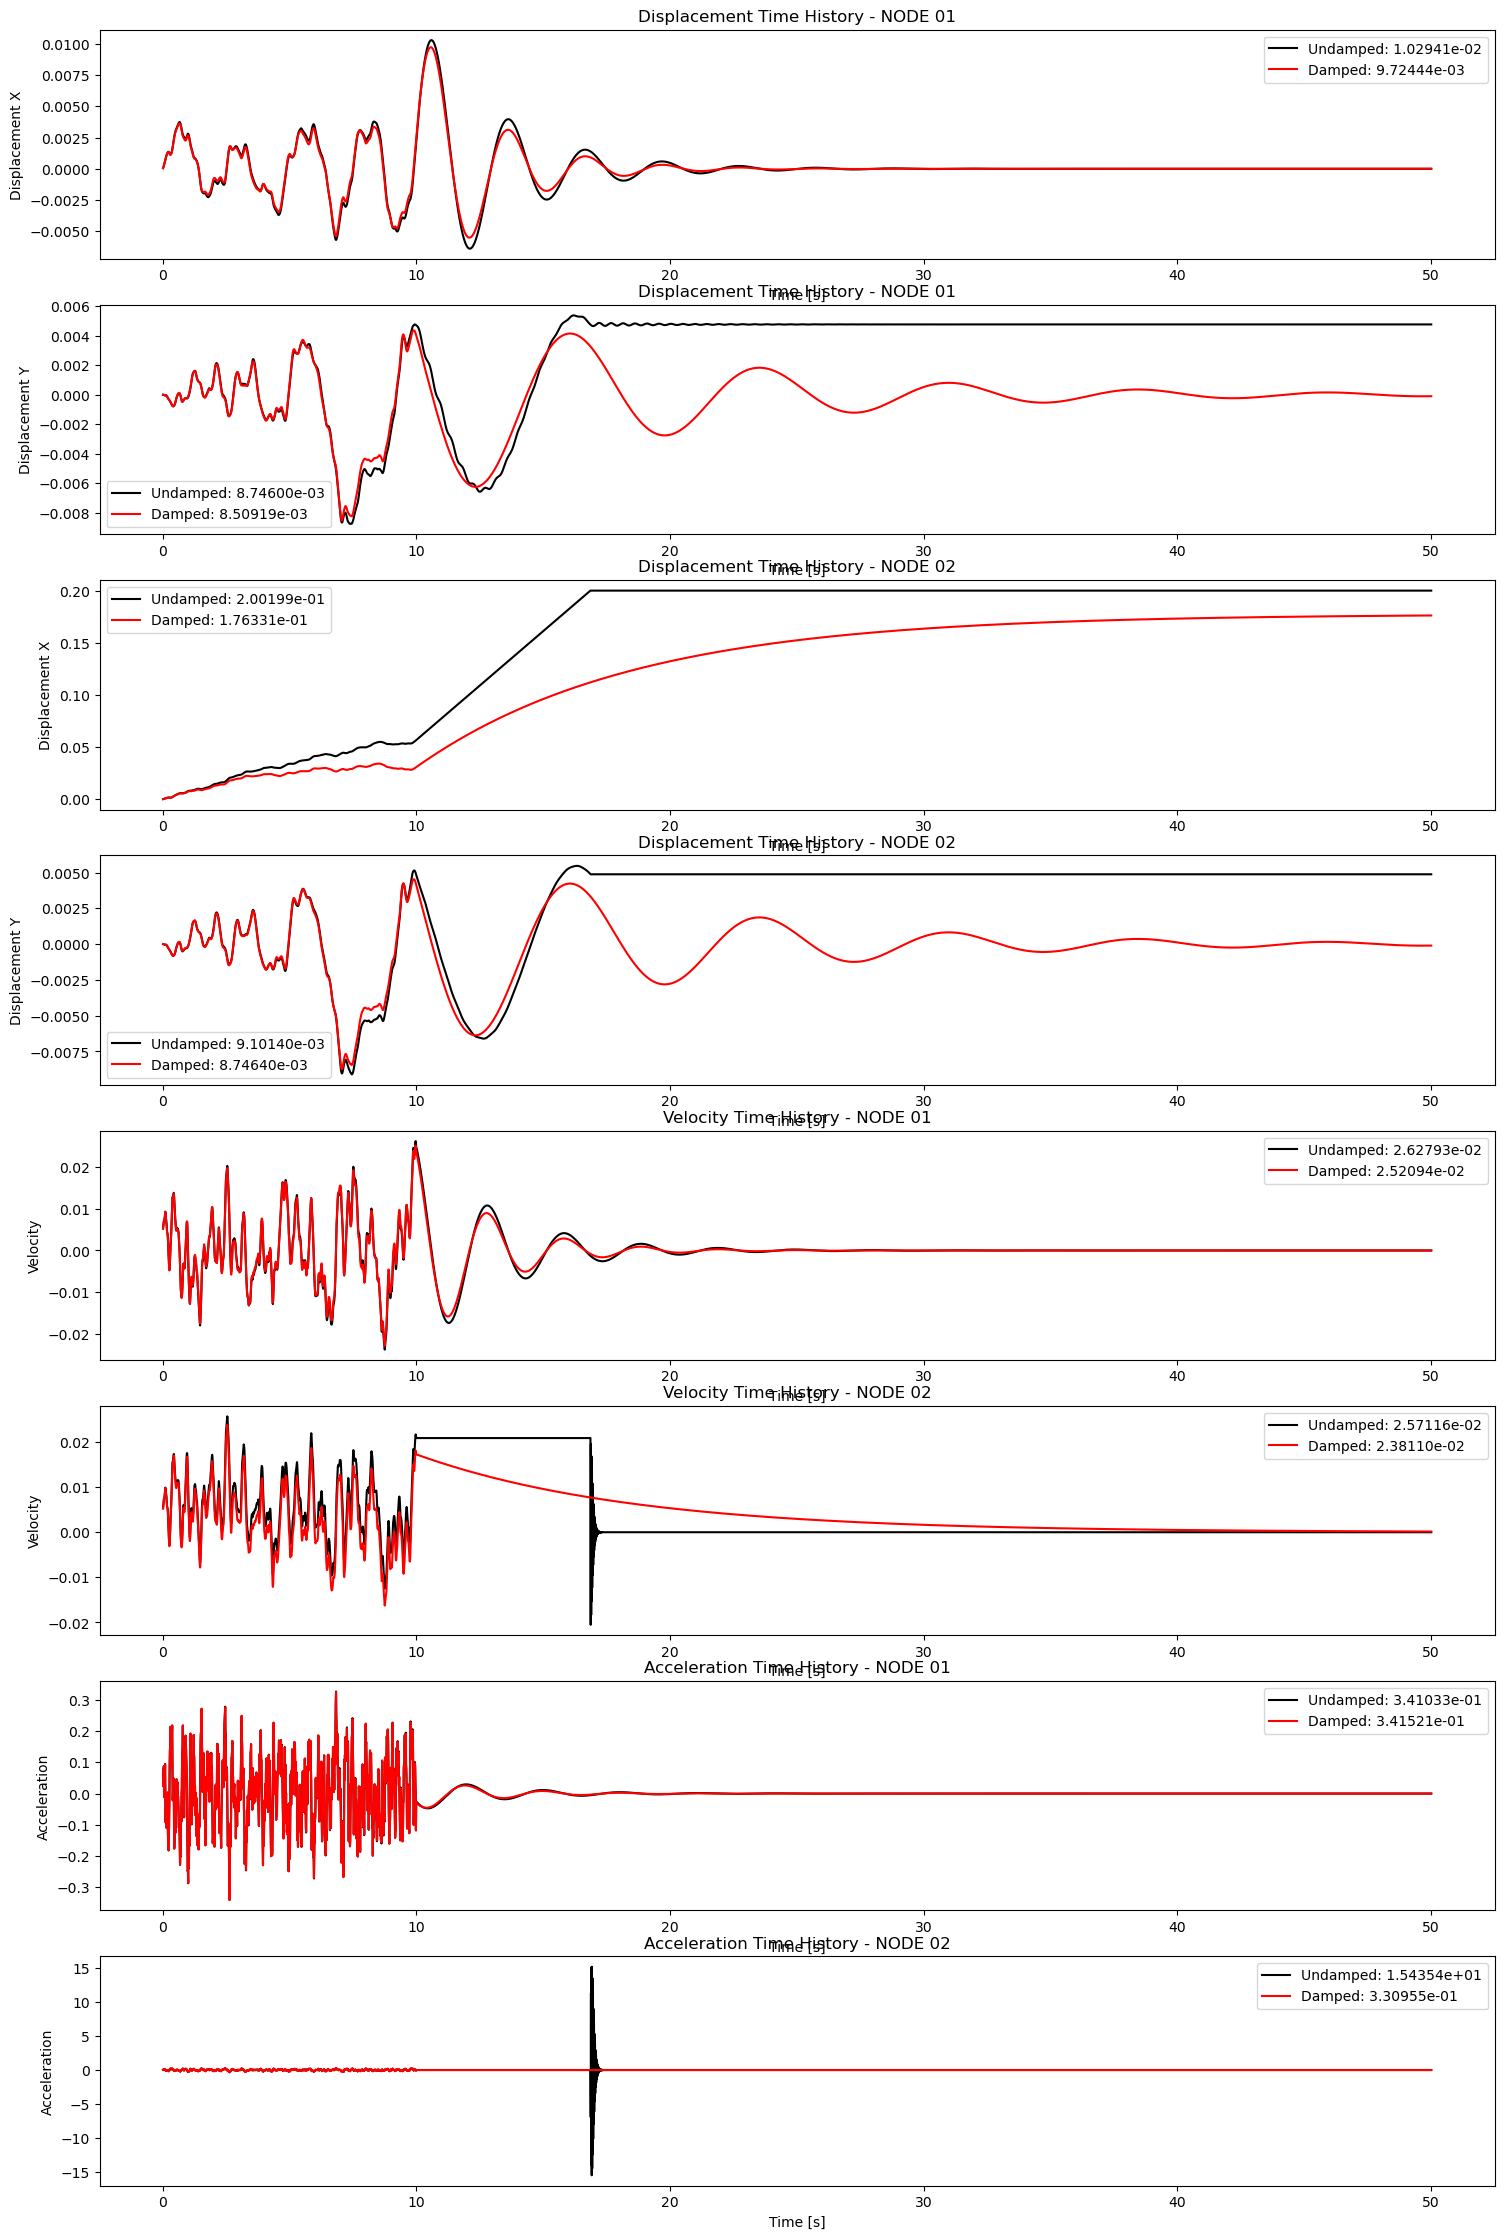

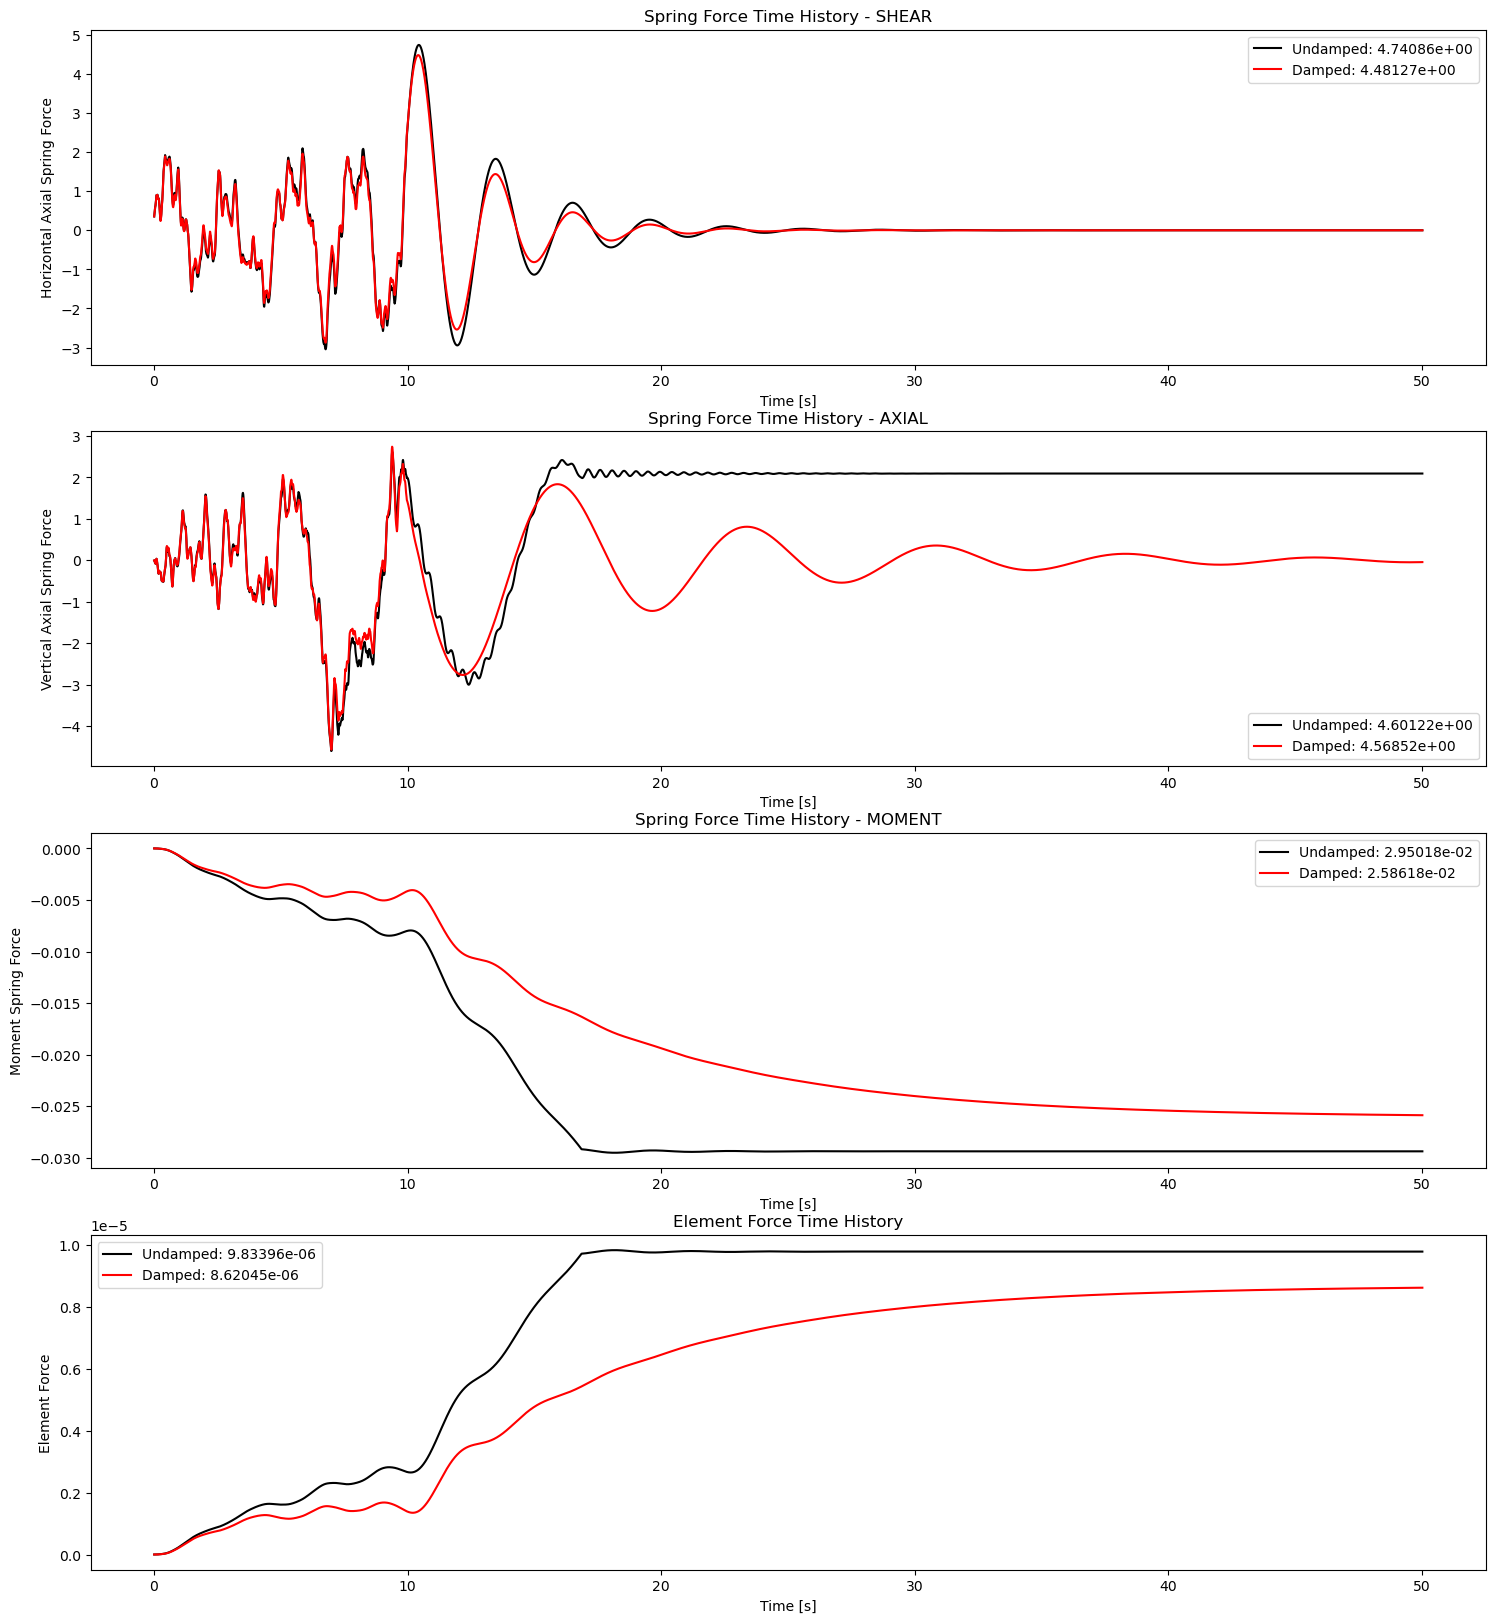

In [23]:
### TWO MASSES TIME HISTORY:
PLOT_4_CHART(time_undamped, time_damped, displacement_n1x_undamped, displacement_n1x_damped, 
                 displacement_n2x_undamped, displacement_n2x_damped, velocity_n1_undamped, 
                 velocity_n1_damped, velocity_n2_undamped, velocity_n2_damped, acceleration_n1_undamped, 
                 acceleration_n1_damped, acceleration_n2_undamped, acceleration_n2_damped, 
                 spring_force_H_undamped, spring_force_H_damped, spring_force_V_undamped, 
                 spring_force_V_damped, spring_force_M_undamped, spring_force_M_damped, 
                 ele_force_undamped, ele_force_damped)

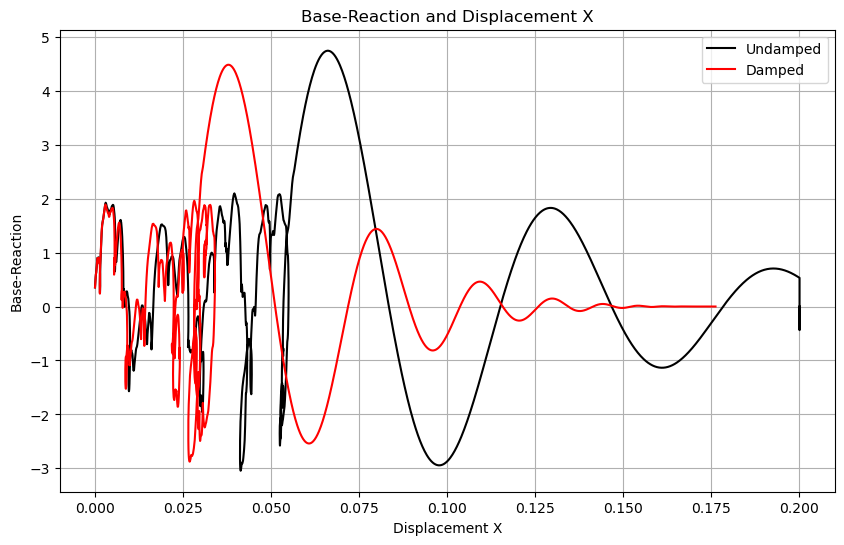

In [26]:
### TWO MASSES BASE REACTION & DISPALCEMENT:
X1 = displacement_n2x_undamped
X2 = displacement_n2x_damped
#Y1 = ele_force_undamped
#Y2 = ele_force_damped
Y1 = spring_force_H_undamped
Y2 = spring_force_H_damped
XLABEL = 'Displacement X'
YLABEL = 'Base-Reaction'
TITLE = 'Base-Reaction and Displacement X'

PLOT_2D(X1, Y1, X2, Y2, XLABEL, YLABEL, TITLE)

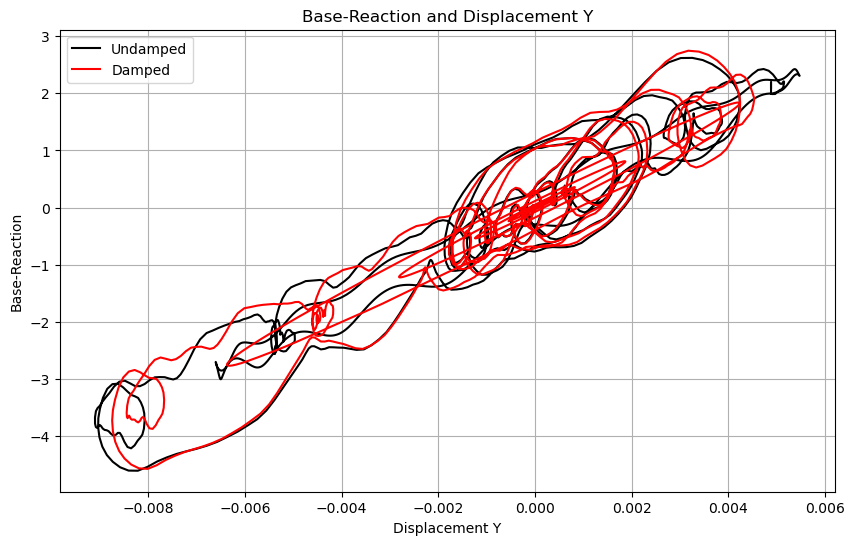

In [27]:
### TWO MASSES BASE REACTION & DISPALCEMENT:
X1 = displacement_n2y_undamped
X2 = displacement_n2y_damped
#Y1 = ele_force_undamped
#Y2 = ele_force_damped
Y1 = spring_force_V_undamped
Y2 = spring_force_V_damped
XLABEL = 'Displacement Y'
YLABEL = 'Base-Reaction'
TITLE = 'Base-Reaction and Displacement Y'

PLOT_2D(X1, Y1, X2, Y2, XLABEL, YLABEL, TITLE)